In [107]:
# !pip install -U finance-datareader

In [8]:
# 라이브러리 불러오기
import pandas as pd
import FinanceDataReader as fdr
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# 주가정보 불러오고, 쓸데없는 정보 제거하고 ,  전일 대비 수익률을 df_drop_pct에 넣어준다.
# 가져온 데이터는 Kodex 200이다.

df = fdr.DataReader('069500','2015','2021')
df_drop = df.drop(['Open','High','Low','Volume','Change'], axis='columns')
df_drop_pct = df_drop.pct_change()
df_drop_pct

,Close
Date,
2015-01-02,NaN
2015-01-05,-0.001983
2015-01-06,-0.017794
2015-01-07,0.002165
2015-01-08,0.012724
...,...
2020-12-23,0.014219
2020-12-24,0.019919
2020-12-28,0.005030


In [10]:
# 이후 매해 N월의 수익률을 계산해준 데이터프레임을 만들어준다.
## 예를 들어 2003-01-31의 데이터는 2003-01-02 부터 ~ 31 까지의 전일대비 수익률을 그냥 무식하게 단순 덧셈한 것.
monthly_df = df_drop_pct.resample('1M').sum()
monthly_df

,Close
Date,
2015-01-31,0.025677
2015-02-28,0.002525
2015-03-31,0.020231
2015-04-30,0.039938
2015-05-31,-0.022280
...,...
2020-08-31,0.028850
2020-09-30,0.012440
2020-10-31,-0.028507


In [11]:
# Datetimeindex를 ..어떻게 쓸줄 몰라서.. 칼럼으로 빼왔다...
# 월로 분류한 꼬리표를 달아준다

monthly_df['index'] = pd.to_datetime(monthly_df.index)
monthly_df['month'] = monthly_df['index'].dt.month
monthly_df.head(20)

,Close,index,month
Date,,,
2015-01-31,0.025677,2015-01-31,1
2015-02-28,0.002525,2015-02-28,2
2015-03-31,0.020231,2015-03-31,3
2015-04-30,0.039938,2015-04-30,4
2015-05-31,-0.022280,2015-05-31,5
2015-06-30,-0.034471,2015-06-30,6
2015-07-31,-0.033351,2015-07-31,7
2015-08-31,-0.047304,2015-08-31,8
2015-09-30,0.021586,2015-09-30,9


In [12]:
# month index를 기준으로 해서 평균 수익률을 구해준다.
# 그러니까 위 데이터에서 month을 기준으로 평균을 구한것..

Result = monthly_df.groupby('month')['Close'].agg(**{'mean_return':'mean'})
Result



,mean_return
month,
1,0.019400
2,-0.016517
3,-0.001529
4,0.034360
5,-0.006948
6,0.011300
7,0.004463
8,-0.007216
9,0.021890


<BarContainer object of 12 artists>

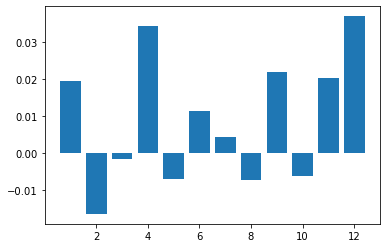

In [13]:
Result['month'] = range(1,13)
plt.bar(Result['month'],Result['mean_return'])